# L-fold Cross Validation

## loading required packages

In [1]:
library(ggplot2)
library(caret)

Loading required package: lattice


## Loading Data

In [2]:
# creating data from csv file
train1 = read.csv("Task1A.csv",header=TRUE)
train.data <- data.frame(train1[,-ncol(train1)])
train.label <- data.frame(train1[, ncol(train1)])

names(train.data)[1]<-paste("X")
names(train.label)[1]<-paste("y")

## KNN regression

In [3]:
# auxillary function fo knn regression algorithm
avg <- function(x) {
    round(mean(x),digits=3)
}


# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)

    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    test1.label = double(0)
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        ###... and calculate the predicted labels according to the average value
        #print(nn)
        test1.label[i]<- (avg(train.label[nn,1]))
    }
    
    ## return the predicted values
    return (test1.label)
}

## L Fold cross validation

In [4]:
# created croos validation  
cv <- function(train.data, train.label, numFold=10){
    # each size of the fold
    size = as.integer(nrow(train.data)/numFold)
    # error dataframe to SD and average errors
    error <- data.frame()
    # iterating for every K
    for(k in 1:20){
        temp = double()
        # iterating for each fold
        for (j in 1:numFold){
                N_indx <- sample(1:nrow(train.data),10,replace=TRUE)
                # partitioning test data and its labels and train and its labels
                test.data1 <-  data.frame(train.data[N_indx,])
                test.label1 <- data.frame(train.label[N_indx,])
                train.data1 <- data.frame(train.data[-N_indx,])
                train.label1 <- data.frame(train.label[-N_indx,])
                
                names(train.data1)[1]<-paste("X")
                names(train.label1)[1]<-paste("y")
                names(test.data1)[1]<-paste("X")
                names(test.label1)[1]<-paste("y")

            # 10 errors for each k
            temp[j] <- sum((knn(train.data1, train.label1, test.data1, K=k) - test.label1)^2)/nrow(test.data1)*100
    }
    # find s.d. and avergae +/- s.d.
    se <- sd(temp)
    a1 <- mean(temp) + se
    a2 <- mean(temp)-se
    # saving erros and their respective standard deviation
    error[k,"Error"] = mean(temp, digits=3)
    error[k,"inverse_K"] = 1/k
    error[k,"amax"] = a1
    error[k,"amin"] = a2
   }     
    return(error)
}

e_avg<- cv(train.data,train.label,numFold=10)

## Plotting errors, average +/- s.d. VS 1/k

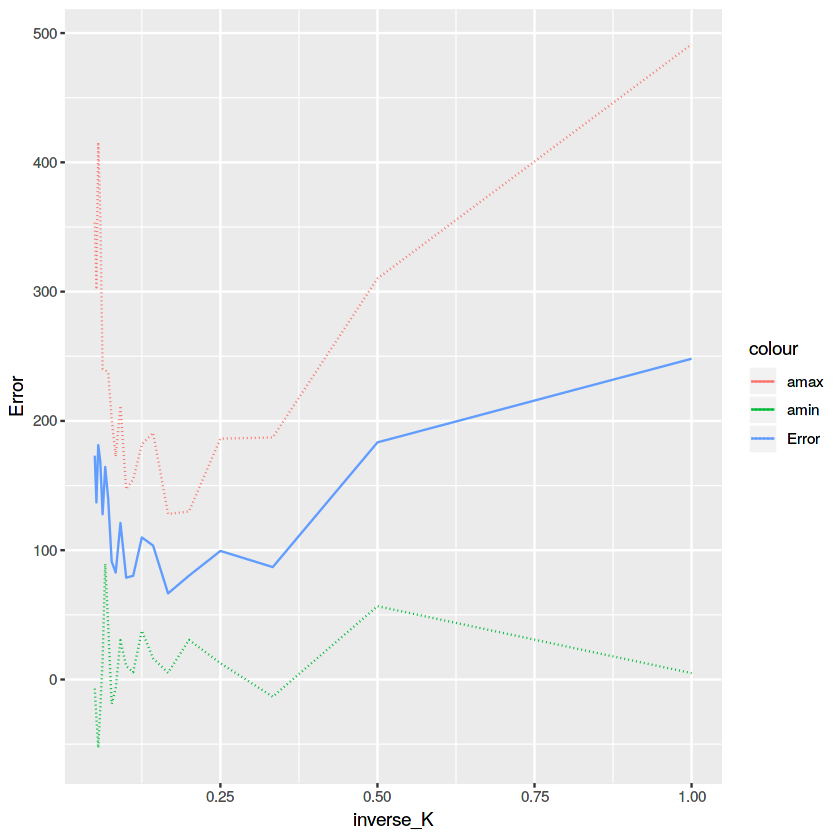

In [5]:
# plotting the graph using ggplots
plot  = ggplot(e_avg,aes(inverse_K)) + geom_line(aes(y = Error,color = "Error"))
plot1 <- plot +geom_line(aes(y=amax,color="amax"),linetype="dotted")+geom_line(aes(y=amin,color='amin'),linetype="dotted")
print(plot1)

## Observations from the Above plot

For K = 10, We can see minimum error and minimum standard deviation. Hence K = 10 is the perfect model with less overfitting and less underfitting.